Рассмотрим задачу минимизации кусочно-линейной функции на сфере
\begin{equation}
\begin{split}
&\min_{x\in R^n} \left \{ f(x) = \max_{1 \leq i \leq k} (a_i^Tx -b_i) \right \}\\
&\text{subject to}\\
&\|x-x_0\|_2^2 \leq \sigma^2
\end{split}
\end{equation}



1. Построим сглаженную версию целевой функции $f_{\mu}(x)$ с параметром гладкости $\mu$
2. Реализуем быстрый градиентный метод из статьи (Nesterov, 2005)

# Function smoothing

$$\min_{x\in R^n} \left \{ f(x) = \max_{1 \leq i \leq k} (a_i^Tx -b_i) \right \}$$
Функции $(a_i^Tx -b_i)$ - выпуклые, тогда мы можем нашу функцию представить на единичном k-мерном симплексе:
$$Q = \{u \in \mathbf{R}^k| \sum\limits_{i = 1}^{k} u_i = 1, u_i\geqslant 0 \ \forall i = \overline{1,k}\}$$
Тогда наша функция имеет вид:
$$f(x) = \max\limits_{u \in Q} \sum\limits_{i = 1}^{k} u_i(a_i^Tx -b_i)$$
Рассмотрим технику сглаживания:
$$f(x) \rightarrow \min\limits_{x \in Q_1}$$
$$f(x) = \max\limits_{u \in Q_2} (u^TAx -\varphi_2(u)) + \varphi_1(x)$$
Где $\varphi_2(u)$ и $\varphi_1(x)$ - гладкие и выпуклые функции, а $\max\limits_{u \in Q_2} (u^TAx -\varphi_2(u))$ - явно не гладкая. В нашем случае $\varphi_1(x) = 0$. Остаётся только негладкая часть.

Рассмотрим такую функцию $d(u)$ - ($\theta$ - сильно выпуклую) и равную нулю в своей оптимальной точке. Тогда нашу функцию $f(x)$ мы будем приближать гладкой функцией $f_{\mu}(x) = \max\limits_{u \in Q_2} (u^TAx -\varphi_2(u) - \mu d(u)) + \varphi_1(x)$. Значит теперь мы работаем с функцией $f_{\mu}(x)$:
$$f_{\mu}(x) \rightarrow \min\limits_{x \in Q_1}$$
$$f_{\mu}(x) \leqslant f(x) \leqslant f_{\mu}(x) + \mu \max\limits_{u \in Q_2} d(u)$$
Обычно для сглаживания на единичном симплексе выбирают функцию энтропии: $\widetilde{d(u)} = \sum\limits_{i = 1}^{k} u_{i}ln(u_{i})$. Найдём её минимум на $Q$:

Метод множителей Лагранжа: 
$$\widetilde{L(u,\lambda)} = \sum\limits_{i = 1}^{k} u_{i}ln(u_{i}) + \lambda(\sum\limits_{i = 1}^{k} u_{i} - 1)$$
$$\nabla_{u_i}\widetilde{L(u,\lambda)} = ln(u^*_i) + 1 + \lambda = 0 \Rightarrow u^*_i = e^{-(1 + \lambda)} \ \forall i = \overline{1,k}$$
$$\sum\limits_{i = 1}^{k} e^{-(1 + \lambda)} = 1 \Rightarrow e^{-(1 + \lambda)} = \frac{1}{k} \Rightarrow \lambda = ln(k) - 1 \Rightarrow u^*_i = \frac{1}{k} \gt 0  \  \forall i = \overline{1,k}$$
Значение функции в точке минимума: $\widetilde{d(u^*)} = -ln(k)$. Значит наша функция $d(u) = \sum\limits_{i = 1}^{k} u_{i}ln(u_{i}) + ln(k)$, т.к $d(u^*) = 0$ и $u^* \in Q$ 
Тогда наша функция $f_\mu$ имеет вид:
$$f_\mu = \max\limits_{u \in Q} [\sum\limits_{i = 1}^{k} u_i(a_i^Tx -b_i) - \mu(\sum\limits_{i = 1}^{k} u_{i}ln(u_{i}) + ln(k))]$$
Рассмотрим функцию $-f_\mu$ и запишем для неё Лагранжиан:
$$L(u, \lambda, \nu) = -\sum\limits_{i = 1}^{k} u_i(a_i^Tx -b_i) + \mu \sum\limits_{i = 1}^{k} u_{i}ln(u_{i}) + \mu ln(k) -\sum\limits_{i = 1}^{k} \nu_i u_i + \lambda(\sum\limits_{i = 1}^{k} u_i - 1)$$
Тогда запишем ККТ:
$$
\begin{cases}
\nabla_{u_i} L(u, \lambda^*, \nu^*) = 0 & (1)\\
\sum\limits_{i = 1}^{k} u^*_i = 1, u^*_i\geqslant 0 \ \forall i = \overline{1,k} & (2) \\
\nu^*_i u^*_i = 0 & (3)\\
\nu^*_i \geqslant 0 & (4)
\end{cases}
$$
$$\nabla_{u_i} L(u, \lambda^*, \nu^*) = -(a_i^Tx -b_i) + \mu(1 + ln(u^*_i)) - \nu^*_i + \lambda^* = 0 \Rightarrow u^*_{i} = exp(\frac{a_i^Tx -b_i + \nu^*_i - \lambda^* - \mu}{\mu}) \ \forall i = \overline{1,k}$$
Заметим, что $u^*_{i} \gt 0 \ \forall i = \overline{1,k}$, тогда из (3) следует, что $\nu^*_i = 0\ \forall i = \overline{1,k}$. Тогда $u^*_{i}$ имеет вид:
$$u^*_{i} = exp(\frac{a_i^Tx -b_i - \lambda^* - \mu}{\mu}) \ \forall i = \overline{1,k}$$
Тогда из (2) следует:
$$\sum\limits_{i = 1}^{k} exp(\frac{a_i^Tx -b_i}{\mu}) exp(\frac{- \lambda^* - \mu}{\mu}) = 1 \Rightarrow exp(\frac{- \lambda^* - \mu}{\mu}) = \frac{1}{\sum\limits_{i = 1}^{k} exp(\frac{a_i^Tx -b_i}{\mu})}$$
$$u^*_{i} = \frac{exp(\frac{a_i^Tx -b_i}{\mu})}{\sum\limits_{i = 1}^{k} exp(\frac{a_i^Tx -b_i}{\mu})} \ \forall i = \overline{1,k}$$
Так как минимум функции $-f_\mu$ совпадает с максимумом $f_\mu$, тогда функция $f_\mu$ имеет вид:
$$f_\mu = \sum\limits_{i = 1}^{k}(\frac{exp(\frac{a_i^Tx -b_i}{\mu})}{\sum\limits_{j = 1}^{k} exp(\frac{a_j^Tx -b_j}{\mu})})(a_i^Tx -b_i) - \mu\sum\limits_{i = 1}^{k}(\frac{exp(\frac{a_i^Tx -b_i}{\mu})}{\sum\limits_{j = 1}^{k} exp(\frac{a_j^Tx -b_j}{\mu})})((a_i^Tx -b_i) - ln(\sum\limits_{j = 1}^{k} exp(\frac{a_j^Tx -b_j}{\mu}))) - \mu ln(k)$$
$$f_\mu = \mu\sum\limits_{i = 1}^{k}(\frac{exp(\frac{a_i^Tx -b_i}{\mu})}{\sum\limits_{j = 1}^{k} exp(\frac{a_j^Tx -b_j}{\mu})}) ln(\sum\limits_{j = 1}^{k} exp(\frac{a_j^Tx -b_j}{\mu}))) - \mu ln(k)$$
Итог:
$$f_\mu = \mu ln(\sum\limits_{j = 1}^{k} exp(\frac{a_j^Tx -b_j}{\mu}))) - \mu ln(k)$$

# Fast Gradient Descent

Будем решать задачу:
$$
\begin{equation}
\begin{split}
&\mu ln(\sum\limits_{j = 1}^{k} exp(\frac{a_j^Tx -b_j}{\mu}))) - \mu ln(k) \rightarrow \min\limits_{x \in \mathbf{R}^n} \\
&\text{subject to}\\
&\|x-x_0\|_2^2 \leq \sigma^2
\end{split}
\end{equation}$$
Посчитаем $\nabla f_\mu$:
$$\nabla f_\mu = \sum\limits_{i = 1}^k \frac{a_{i}exp(\frac{a_i^Tx -b_i}{\mu})}{\sum\limits_{j = 1}^{k} exp(\frac{a_j^Tx -b_j)}{\mu})}$$
Функция $f_\mu$ - с Липшицевым градиентом $\Rightarrow$ $f_\mu(y) - f_\mu(x) \leqslant <\nabla f_\mu(x), y-x> + \frac{L\|y-x\|^2_2}{2}$. Пусть множество $T_Q(x) \subset Q$ - множество оптимальных решений того, что справа, где $Q = \{x \in \mathbf{R}^n | \|x-x_0\|^2_2 \leqslant \sigma^2\}$ 
$$T_Q(x) = arg\min\limits_{y \in Q} \{<\nabla f_\mu(x), y-x> + \frac{L\|y-x\|^2_2}{2}\}$$
$$T_Q(x) = arg\min\limits_{y \in Q} \{<\nabla f_\mu(x), y> + \frac{L\|y\|^2_2}{2} - L<x,y>\}$$
$$T_Q(x) = arg\min\limits_{y \in Q} \{<\nabla f_\mu(x) -Lx, y> + \frac{L\|y\|^2_2}{2} - L<x_0,y> + L<x_0,y>\}$$
$$T_Q(x) = arg\min\limits_{y \in Q} \{<\nabla f_\mu(x) -Lx +Lx_0, y - x_0> + \frac{L\|y - x_0\|^2_2}{2}\}$$
$$T_Q(x) = x_ 0 + arg\min\limits_{z \in \widetilde{Q}} \{<\nabla f_\mu(x) -Lx +Lx_0, z> + \frac{L\|z\|^2_2}{2}\}, \widetilde{Q} = \{x \in \mathbf{R}^n | \|x\|_2^2 \leqslant \sigma^2\}$$
ККТ:
$$L(z, \lambda) = <\nabla f_\mu(x) -Lx +Lx_0, z> + \frac{L\|z\|^2_2}{2}\ + \lambda (\|z\|_2^2 - \sigma^2)$$
$$\nabla_z L(z, \lambda) = \nabla f_\mu(x) -Lx +Lx_0 + Lz + 2\lambda z = 0 \Rightarrow \lambda = \frac{-\nabla f_\mu(x) +Lx -Lx_0 - Lz}{2z}$$
$$\lambda (\|z\|_2^2 - \sigma^2) = 0 \Rightarrow z = x - x_0 -\frac{\nabla f_\mu(x)}{L} \ or \  \|z\|_2^2 = \sigma^2$$
Чтобы получить минимальное значение, при выходе за множество мы берём вектор z, длины $\sigma$, который имеет направление, противоположное $\nabla f_\mu(x) -Lx +Lx_0$. Итого:
$$ T_Q(x) =
\begin{cases}
x - \frac{\nabla f_\mu(x)}{L}, & \|x - x_0 -\frac{\nabla f_\mu(x)}{L}\|_2^2 \leqslant \sigma^2\\ 
x_0 + (x - x_0 - \frac{\nabla f_\mu(x)}{L}) \times \frac{\sigma}{\|x - x_0 -\frac{\nabla f_\mu(x)}{L}\|_2}, & \|x - x_0 -\frac{\nabla f_\mu(x)}{L}\|_2^2 \gt \sigma^2 
\end{cases}
$$
Теперь найдём $z_k$:
$$z_k = arg \min\limits_x \{\frac{L}{\xi} d(x) + \sum\limits_{i = 0}^k \frac{i+1}{2}[f_\mu(x_i) + <\nabla f_\mu(x_i), x - x_i>], x \in Q\}$$
Берём сильно выпуклую функцию $d(x) = \frac{1}{2}\|x -x_0\|_2^2$ на $Q$ с параметром сильной выпуклости $\xi$. Тогда:
$$z_k = arg \min\limits_x \{\frac{L}{2\xi} \|x - x_0\|_2^2 + \sum\limits_{i = 0}^k \frac{i+1}{2}[f_\mu(x_i) + <\nabla f_\mu(x_i), x - x_i>], x \in Q\}$$
$$z_k = arg \min\limits_x \{\frac{L}{2\xi} \|x-x_0\|_2^2 + \sum\limits_{i = 0}^k \frac{i+1}{2}[<\nabla f_\mu(x_i), x>], x \in Q\}$$
$$z_k = arg \min\limits_x \{\frac{L}{2\xi} \|x - x_0\|_2^2 + <\sum\limits_{i = 0}^k \frac{i+1}{2} \nabla f_\mu(x_i), x - x_0>, x \in Q\}$$
$$z_k = x_ 0 + arg \min\limits_{z \in \widetilde{Q}} \{\frac{L}{2\xi} \|z\|_2^2 + <\sum\limits_{i = 0}^k \frac{i+1}{2} \nabla f_\mu(x_i), z>\}$$
Аналогично $T_Q(x)$ находим $z_k$:
$$\begin{cases}
x_0 - \frac{\xi}{L} (\sum\limits_{i = 0}^k \frac{i+1}{2} \nabla f_\mu(x_i)), & \| \frac{\xi}{L} (\sum\limits_{i = 0}^k \frac{i+1}{2} \nabla f_\mu(x_i))\|_2^2 \leqslant \sigma^2\\ 
x_0 - (\frac{\xi}{L} (\sum\limits_{i = 0}^k \frac{i+1}{2} \nabla f_\mu(x_i)) \times \frac{\sigma}{\|\frac{\xi}{L} (\sum\limits_{i = 0}^k \frac{i+1}{2} \nabla f_\mu(x_i))\|_2}, & \| \frac{\xi}{L} (\sum\limits_{i = 0}^k \frac{i+1}{2} \nabla f_\mu(x_i))\|_2^2 \gt \sigma^2
\end{cases}
$$
Итого метод выглядит следующим образом:
$$
\begin{equation}
\begin{split}
& Compute \ \ f_\mu = \mu ln(\sum\limits_{j = 1}^{k} exp(\frac{a_j^Tx -b_j}{\mu}))) - \mu ln(k), \nabla f_{\mu} =  \sum\limits_{i = 1}^k \frac{a_{i}exp(\frac{a_i^Tx -b_i}{\mu})}{\sum\limits_{j = 1}^{k} exp(\frac{a_j^Tx -b_j)}{\mu})}\\
& Compute \ \  y_k = T_Q(x_k) = \begin{cases}
x - \frac{\nabla f_\mu(x)}{L}, & \|x - x_0 -\frac{\nabla f_\mu(x)}{L}\|_2^2 \leqslant \sigma^2\\ 
x_0 + (x - x_0 - \frac{\nabla f_\mu(x)}{L}) \times \frac{\sigma}{\|x - x_0 -\frac{\nabla f_\mu(x)}{L}\|_2}, & \|x - x_0 -\frac{\nabla f_\mu(x)}{L}\|_2^2 \gt \sigma^2 
\end{cases}\\
& Compute \ \ z_k = \begin{cases}
x_0 - \frac{\xi}{L} (\sum\limits_{i = 0}^k \frac{i+1}{2} \nabla f_\mu(x_i)), & \| \frac{\xi}{L} (\sum\limits_{i = 0}^k \frac{i+1}{2} \nabla f_\mu(x_i))\|_2^2 \leqslant \sigma^2\\ 
x_0 - (\frac{\xi}{L} (\sum\limits_{i = 0}^k \frac{i+1}{2} \nabla f_\mu(x_i)) \times \frac{\sigma}{\|\frac{\xi}{L} (\sum\limits_{i = 0}^k \frac{i+1}{2} \nabla f_\mu(x_i))\|_2}, & \| \frac{\xi}{L} (\sum\limits_{i = 0}^k \frac{i+1}{2} \nabla f_\mu(x_i))\|_2^2 \gt \sigma^2
\end{cases} \\
& Make \ \ x_{k+1} = \frac{2}{k+3}z_k + \frac{k+1}{k+3} y_k
\end{split}
\end{equation}
$$

In [1]:
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
from tqdm import tqdm
class Smooth_solver():
    def __init__(self, L, sigma1, x0, A, b, sigma=1):
        self.L = L
        self.sigma1 = sigma1
        self.x0 = x0
        self.A = A
        self.b = b
        self.sigma = sigma
        self.n_step = 0
        self.k = len(A)
    
    def _save_f_and_time(self):
        for_u = np.exp((self.A @ self.x - self.b) / self.mu)
        f_mu = self.mu * np.log(np.sum(for_u)) - self.mu * np.log(self.k)
        f = np.max(self.A @ self.x - self.b)
        self.save_mu_f_loss.append(f_mu)
        self.save_loss.append(f)
        time = (datetime.now() - self.time_start).total_seconds()
        if time > 1000:
            self.break_flag = True
        self.save_time.append(time)
    
    def solve(self, mu, steps=1000):
        self.mu = mu
        self.time_start = datetime.now()
        self.break_flag = False
        self.save_loss = []
        self.save_mu_f_loss = []
        self.save_time = []
        self.x = self.x0
        self._save_f_and_time()
        self.accum_grad = np.zeros(self.x0.shape)
        for step in tqdm(range(steps)):
            if self.break_flag:
                break
            for_u = np.exp((self.A @ self.x - self.b) / self.mu)
            grad_f_mu = (self.A.T) @ (for_u / np.sum(for_u))
            self.accum_grad += (step + 1) * grad_f_mu / 2
            diff_y = self.x - self.x0 - grad_f_mu / self.L
            if (diff_y ** 2).sum() > self.sigma ** 2:
                diff_y /= (((diff_y ** 2).sum()) ** 0.5)
            y = self.x0 + diff_y
            diff_z = -(self.sigma1 / self.L) * self.accum_grad
            if (diff_z ** 2).sum() > self.sigma ** 2:
                diff_z /= (((diff_z ** 2).sum()) ** 0.5)
            z = self.x0 + diff_z
            self.x = (2 / (step + 3)) * z + ((step + 1) / (step + 3)) * y
            self._save_f_and_time()

Тест работы

In [126]:
A = np.random.random((1000, 1000))
b = np.random.random((1000, 1))
x0 = np.random.random((1000, 1))

In [127]:
k = Smooth_solver(1e4, 1, x0, A, b)

In [132]:
k.solve(4e-1, int(1e3))

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 819.09it/s]


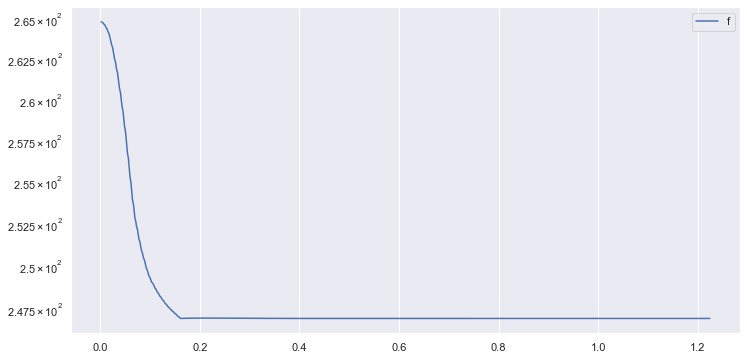

In [133]:
plt.figure(figsize=(12, 6))
plt.plot(k.save_time, k.save_loss, label='f')
plt.yscale('log')
plt.legend();

# Barrier Method

Указанная выше задача может быть записана в эквивалентном виде

$$
\begin{equation}
\begin{split}
&\min_{x\in R^n, t} t \\
&\text{subject to}\\
&a_i^Tx -b_i \leq t, \quad 1\leq i\leq k\\
&\|x-x_0\|_2^2 \leq \sigma^2
\end{split}
\end{equation}
$$
Добавляем барьеры: 
$$
\begin{equation}
\begin{split}
&t + \sum\limits_{i = 1}^k \mathbb{1}_{-}(a_i^Tx - b_i - t) + \mathbb{1}_{-}(\|x-x_0\|_2^2 - \sigma^2) \rightarrow \min, \ \ \ \ \mathbb{1}_{-}(u) = 
\begin{cases}
0 \ , & u \leqslant 0 \\ 
+\infty \ ,  & else 
\end{cases}\\
\end{split}
\end{equation}
$$
$$
\mathbb{1}_{-}(u) = - \frac{1}{r_k} ln(-u), \ \ \ r_k = \theta \cdot r_{k-1}, \ \ \theta \gt 1$$
$$\varphi(x, t) = - \sum\limits_{i = 1}^k ln(t + b_i - a_i^Tx) - ln(\sigma^2 - \|x-x_0\|_2^2)$$ 
Барьерный метод: 
Given: strictly feasible x = arg $\min(\varphi(x, t))$, $r = r_0$, $\theta \gt 1$, $\epsilon \gt 0$

for $m \geqslant 1:$

Compute: $
\begin{equation*}
\left(
\begin{array}{cc}
t^*(r_m) & x^*(r_m)  \\
\end{array}
\right)
\end{equation*} = arg \min (r_m \cdot t + \varphi(x, t))$

Update: $\begin{equation*}
\left(
\begin{array}{cc}
t & x  \\
\end{array}
\right)
\end{equation*} = \left(
\begin{array}{cc}
t^*(r_m) & x^*(r_m)  \\
\end{array}
\right)$

Check: $\frac{l}{r_m} \lt \epsilon$, где l - количество ограничений

If wrong: $r_{m + 1} = r_m \cdot \theta$

С помощью метода Ньютона найдём $r_m \cdot t + \varphi(x, t) \rightarrow min$. Пусть $f(x, t) = r_m \cdot t + \varphi(x)$. Тогда метод Ньютона выглядит следующим образом:
$$r_m \cdot t + \varphi(x, t) \rightarrow min$$
$$\nabla_x f(x, t) = \sum_{i = 1}^{k} \frac{a_i}{t + b_i - a_i^Tx} + \frac{2(x - x_0)}{\sigma^2 - \|x-x_0\|_2^2}$$
$$\nabla_{xx}^2 f(x, t) = \sum_{i = 1}^{k} \frac{a_ia^T_i}{(t + b_i - a_i^Tx)^2} + \frac{2 * I}{\sigma^2 - \|x-x_0\|_2^2} + \frac{4(x-x_0)(x-x_0)^T}{(\sigma^2 - \|x-x_0\|_2^2)^2}$$
$$\nabla_t f(x, t) = r_ k - \sum_{i = 1}^{k} \frac{1}{t + b_i - a_i^Tx}$$
$$\nabla^2_{tx} f(x, t) = \nabla^2_{xt} f(x, t) = - \sum_{i = 1}^{k} \frac{a_i}{(t + b_i - a_i^Tx)^2}$$
$$\nabla^2_{tt} f(x, t) = \sum_{i = 1}^{k} \frac{1}{(t + b_i - a_i^Tx)^2}$$
Значит градиент и гессиан выглядят так:
$$ 
\begin{equation*}
\nabla f(t, x) = r_k \left(
\begin{array}{c}
1  \\
0  \\
\end{array}
\right) + \sum_{i = 1}^{k} \frac{1}{t + b_i - a_i^Tx} \left(
\begin{array}{c}
-1  \\
a_i  \\
\end{array}
\right) + \frac{2}{\sigma^2 - \|x-x_0\|_2^2} \left(
\begin{array}{c}
0  \\
x - x_0  \\
\end{array}
\right)
\end{equation*}
$$
$$
\begin{equation*}
\nabla^2 f(t,x) = \sum_{i = 1}^{k} \frac{1}{(t + b_i - a_i^Tx)^2} \left(
\begin{array}{cc}
1 & -a_i^T  \\
-a_i & a_ia^T_i  \\
\end{array}
\right) + \frac{2}{\sigma^2 - \|x-x_0\|_2^2} \left(
\begin{array}{cc}
0 & 0  \\
0 & I  \\
\end{array}
\right) + \frac{4}{(\sigma^2 - \|x-x_0\|_2^2)^2} \left(
\begin{array}{cc}
0 & 0  \\
0 & (x-x_0)(x-x_0)^T  \\
\end{array}
\right)
\end{equation*}
$$

Тогда 

for $j \geqslant 1$:

Compute :$d_j = - [\nabla^2 f(t_j, x_j)]^{-1} \nabla f(t_j, x_j)$ - направление движения

Compute: $\lambda^2(t_j, x_j) = - \nabla^T f(t_j, x_j) d_j$ - дикремент

Stopping criteria: $\frac{\lambda^2(t_j, x_j)}{2} \lt \epsilon$

Else don't stop:

Line search (backtracking) - вдоль $d_j$ ищем $p_j$ - величину шага

Update: 
$
\begin{equation*}
\left(
\begin{array}{cc}
t_{j + 1} & x_{j + 1}  \\
\end{array}
\right) = \left(
\begin{array}{cc}
t_j & x_j  \\
\end{array}
\right) + p_j d_j
\end{equation*}
$

Backtracking:

$\alpha \in (0, \frac{1}{2})$, $\beta \in (0, 1)$

while 
$
\begin{equation*}
f\left(
\begin{array}{cc}
t + pd & x + pd  \\
\end{array}
\right) \gt f\left(
\begin{array}{cc}
t & x   \\
\end{array}
\right) + \alpha p <\nabla f \left(
\begin{array}{cc}
t & x   \\
\end{array}
\right), d> (можно \ заменить \ на \ -\lambda^2)
\end{equation*}
$

Update: $p = \beta p$

В итоге, когда будет выполнен stop criteria мы возьмём данную точку в качестве $\begin{equation*}
\left(
\begin{array}{cc}
t^*(r_m) & x^*(r_m)  \\
\end{array}
\right)
\end{equation*}$


In [3]:
class Bar_New_solver():
    def __init__(self, alpha, beta, mu, x0, A, b, sigma=1):
        self.alpha = alpha
        self.beta = beta
        self.mu = mu
        self.x0 = x0
        self.A = A
        self.b = b
        self.sigma = sigma
        
    def _save_f_and_time(self):
        f = np.max(self.A @ self.t_x[1:] - self.b)
        self.save_loss.append(f)
        time = (datetime.now() - self.time_start).total_seconds()
        if time > 1000:
            self.break_flag = True
        self.save_time.append(time)
    
    def _newton_solve(self, r):
        while True:
            if (datetime.now() - self.time_start).total_seconds() > 1000:
                break
            grad = np.zeros(self.t_x.shape)
            grad[0][0] = 1
            help_u = (1 / (self.b + self.t_x[0][0] - self.A @ self.t_x[1:]))
            grad[0][0] -= np.sum(help_u) / r
            grad[1:] += (1 / r) * (self.A.T) @ help_u
            xx0_norm = np.sum((self.t_x[1:] - self.x0) ** 2)
            grad[1:] += (2 / r) * (1 / (self.sigma ** 2 - xx0_norm)) * (self.t_x[1:] - self.x0)
            gesse = np.zeros((self.t_x.shape[0], self.t_x.shape[0]))
            for i, el in enumerate(help_u):
                gesse += (1 / r) * (el[0]**2) * np.vstack([[1.], (-self.A[i]).reshape(-1, 1)]) @ np.hstack([ [[1.]], (-self.A[i]).reshape(1, -1) ])
            gesse[1:, 1:] += (4 / (r * (self.sigma ** 2 - xx0_norm)**2)) * (self.t_x[1:] - self.x0) @ ((self.t_x[1:] - self.x0).T)
            gesse[1:, 1:] += (2 / (r * (self.sigma ** 2 - xx0_norm))) * np.eye(self.x0.shape[0])
            d = - np.linalg.inv(gesse) @ grad
            lmbda2 = - grad.T @ d
            if lmbda2 / 2 <= self.eps:
                break
            t = 1
            fx = self.t_x[0][0] - (1/r) * np.sum(np.log((self.b + self.t_x[0][0] - self.A @ self.t_x[1:]))) - (1/r) * np.log(self.sigma ** 2 - xx0_norm)
            while True:
                t_x_new = self.t_x + t * d
                if np.all(self.b + t_x_new[0][0] - self.A @ t_x_new[1:] > 0) and self.sigma ** 2 - np.sum((t_x_new[1:] - self.x0) ** 2) > 0:
                    fx_new = t_x_new[0][0] - (1/r) * np.sum(np.log((self.b + t_x_new[0][0] - self.A @ t_x_new[1:]))) - (1/r) * np.log(self.sigma ** 2 - np.sum((t_x_new[1:] - self.x0) ** 2))
                    if fx_new < fx - self.alpha * t * lmbda2:
                        break
                t = t * self.beta
            self.t_x += t * d
            
    def solve(self, eps, r0):
        self.save_loss = []
        self.save_time = []
        self.break_flag = False
        self.eps = eps
        self.time_start = datetime.now()
        r = r0
        t = np.max(self.A @ self.x0 - self.b) + 1
        self.t_x = np.vstack([[[t]], self.x0]) 
        self._save_f_and_time()
        while len(self.A) / r >= self.eps:
            if self.break_flag:
                break
            self._newton_solve(r)
            self._save_f_and_time()
            r *= self.mu

Тест работы

In [162]:
A = np.random.random((100, 100))
b = np.random.random((100, 1))
x0 = np.random.random((100, 1))

In [163]:
s1 = Smooth_solver(1e6, 1, x0, A, b)
s2 = Bar_New_solver(1/3, 1/2, 2, x0, A, b)

In [164]:
s1.solve(5e-2, int(1e4))

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2891.53it/s]


In [165]:
s2.solve(1e-4, 1)

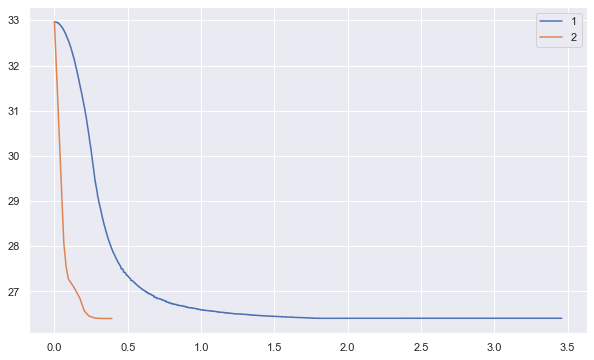

In [166]:
plt.plot(s1.save_time, s1.save_loss, label='1')
plt.plot(s2.save_time, s2.save_loss, label='2')
plt.legend();

# Comparison 

Сгенерируем искусственные (случайные) данные для тестирования алгоритмов:

Нам хочется сравнить эффективность методов для различной размерности задачи (то есть при росте $n$ и $k$). Ограничим время вычисления на каждый инстанс 1000с.

а) Первый тест: $k=10$, $n_1=10$, $n_2 = 100$, $n_3=1000$, $n_4=10000$, $n_5=100000$ (5 сценариев).

б) Второй тест: $n=10$, $k_1=10$, $k_2 = 100$, $k_3=1000$, $k_4=10000$, $k_5=100000$ (5 сценариев).

в) Третий тест: [$n_1 = rand(10)$, $k_1 = rand(10)$], [$n_2 = rand(100)$, $k_2 = rand(100)$], [$n_3 = rand(1000)$, $k_3 = rand(1000)$], [$n_4 = rand(10000)$, $k_4 = rand(10000)$], [$n_5 = rand(100000)$, $k_5 = rand(100000)$] (5 сценариев).

Для каждого конкретного сценария построим рисунок с графиками, описывающими работу алгоритма: по оси $x$ отложено время (работы алгоритма), а по оси $y$ значение целевой функции для каждого из алгоритмов.

In [201]:
def test_methods(k_max, n_max, barrier_eps, barrier_r0, smooth_steps, smooth_L, smooth_mu1, flag_bar, sigma1=1, alpha=1/3, beta=1/2, mu=2):
    k = np.random.randint(1, k_max)
    n = np.random.randint(1, n_max)
    print(f"k={k}; n={n}")
    A = np.random.random((k, n))
    b = np.random.random((k, 1))
    x0 = np.random.random((n, 1))
    smooth_solver = Smooth_solver(smooth_L, sigma1, x0, A, b)
    if flag_bar:
        bar_new_solver = Bar_New_solver(alpha, beta, mu, x0, A, b)
    smooth_solver.solve(smooth_mu1, smooth_steps)
    if flag_bar:
        bar_new_solver.solve(barrier_eps, barrier_r0)
    plt.plot(smooth_solver.save_time, smooth_solver.save_loss, label='Smooth')
    if flag_bar:
        plt.plot(bar_new_solver.save_time, bar_new_solver.save_loss, label='Barrier_Newton')
    print(f"Minumum_smooth = {smooth_solver.save_loss[-1]}")
    if flag_bar:
        print(f"Minumum_barrier = {bar_new_solver.save_loss[-1]}")
        print(f"Diff_between_solutions = {100 * np.sum((smooth_solver.x - bar_new_solver.t_x[1:])**2) / np.sum(smooth_solver.x ** 2):.7f}%")
    plt.legend();

    

# First Pair of Tests

k=3; n=8


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 18178.01it/s]

Minumum_smooth = 0.6336040505265463
Minumum_barrier = 0.6317139669748894
Diff_between_solutions = 0.0685605%


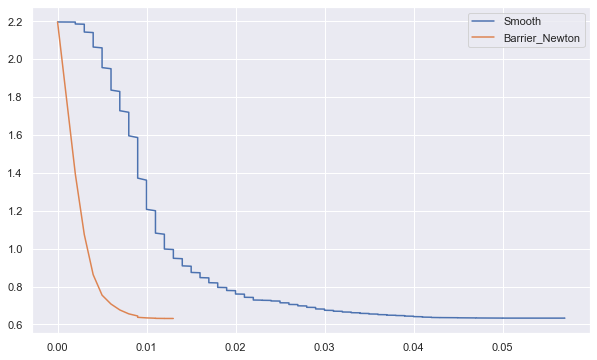

In [205]:
test_methods(k_max=10, n_max=10, barrier_eps=1e-4, barrier_r0=1, smooth_steps=int(1e3), smooth_L=1e4, smooth_mu1=1e-2, flag_bar=True)

k=3; n=53


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 17258.81it/s]

Minumum_smooth = 8.364771116088054
Minumum_barrier = 8.335758898480984
Diff_between_solutions = 0.0608339%


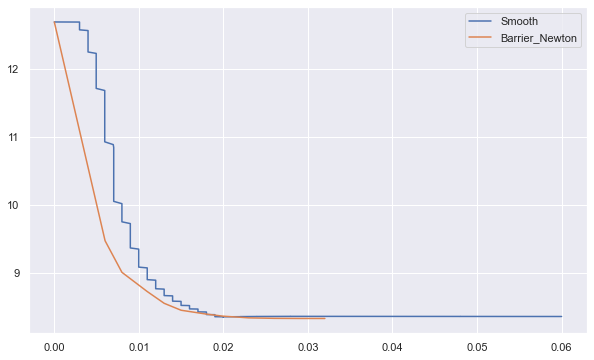

In [206]:
test_methods(k_max=10, n_max=100, barrier_eps=1e-4, barrier_r0=1, smooth_steps=int(1e3), smooth_L=1e4, smooth_mu1=1e-1, flag_bar=True)

k=9; n=438


100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 14676.06it/s]


Minumum_smooth = 104.65456612583583
Minumum_barrier = 104.6269254913307
Diff_between_solutions = 0.0034387%


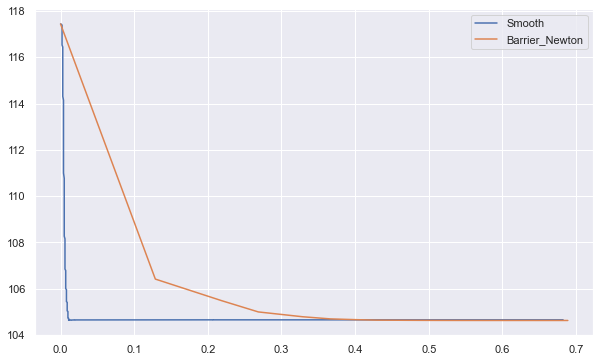

In [207]:
test_methods(k_max=10, n_max=1000, barrier_eps=1e-3, barrier_r0=1, smooth_steps=int(1e4), smooth_L=1e4, smooth_mu1=1, flag_bar=True)

k=9; n=5567


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 3200.28it/s]


Minumum_smooth = 1356.5072445886312
Minumum_barrier = 1356.061398401881
Diff_between_solutions = 0.0011166%


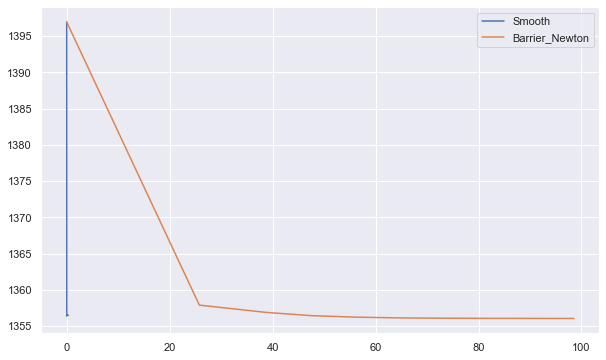

In [209]:
test_methods(k_max=10, n_max=10000, barrier_eps=1e-2, barrier_r0=1, smooth_steps=int(1e3), smooth_L=1e4, smooth_mu1=5, flag_bar=True)

In [211]:
test_methods(k_max=10, n_max=100000, barrier_eps=1e-2, barrier_r0=1, smooth_steps=int(1e3), smooth_L=1e4, smooth_mu1=100, flag_bar=True)

k=3; n=46102


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 870.89it/s]


MemoryError: Unable to allocate 15.8 GiB for an array with shape (46103, 46103) and data type float64

Вывод: Барьерный метод не может работать с гессианом при таком n.

k=5; n=59106


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 552.59it/s]


Minumum_smooth = 14717.90449222726


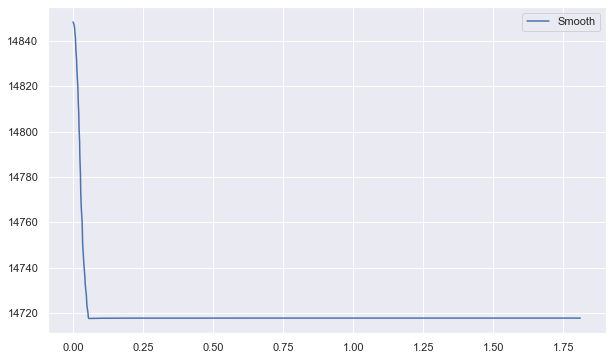

In [212]:
test_methods(k_max=10, n_max=100000, barrier_eps=1e-2, barrier_r0=1, smooth_steps=int(1e3), smooth_L=1e4, smooth_mu1=100, flag_bar=False)

С увеличением n барьерный метод начинает работать гораздо хуже, так как работает с матрицей размера nxn, когда метод сглаживания работает только с матрицами размера k x n.

# Second Pair of Tests

k=4; n=3


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 19226.87it/s]

Minumum_smooth = -0.1990838815167607
Minumum_barrier = -0.21533902784267506
Diff_between_solutions = 14.9482287%


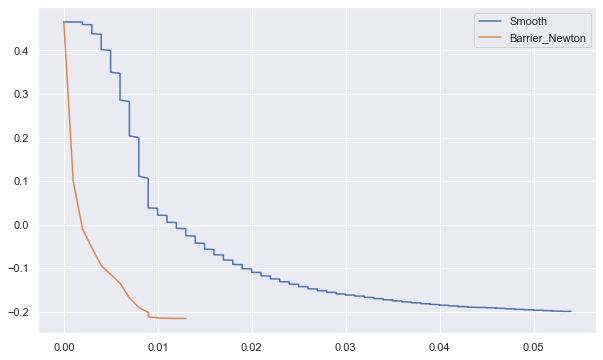

In [241]:
test_methods(k_max=10, n_max=10, barrier_eps=1e-4, barrier_r0=1, smooth_steps=int(1e3), smooth_L=1e4, smooth_mu1=1e-2, flag_bar=True)

k=96; n=4


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 18510.22it/s]

Minumum_smooth = -0.25992973024175825
Minumum_barrier = -0.263364077841886
Diff_between_solutions = 0.1275543%


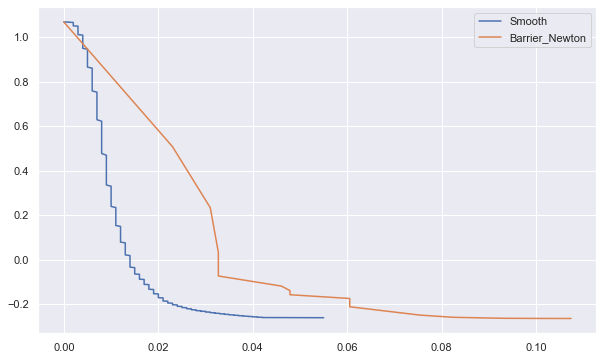

In [242]:
test_methods(k_max=100, n_max=10, barrier_eps=1e-3, barrier_r0=1, smooth_steps=int(1e3), smooth_L=1e4, smooth_mu1=1e-2, flag_bar=True)

k=276; n=8


100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 15057.85it/s]


Minumum_smooth = 0.6297983971966151
Minumum_barrier = 0.6249444225910388
Diff_between_solutions = 0.2591005%


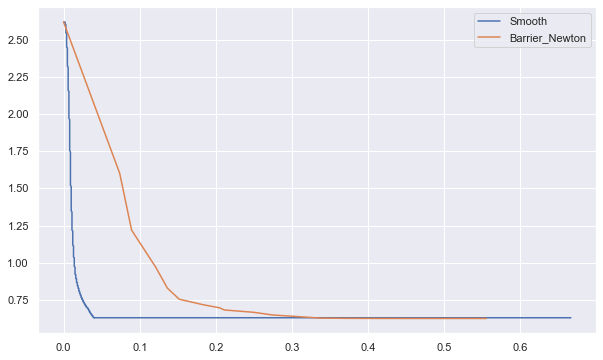

In [255]:
test_methods(k_max=1000, n_max=10, barrier_eps=1e-6, barrier_r0=1, smooth_steps=int(1e4), smooth_L=1e4, smooth_mu1=1e-2, flag_bar=True)

k=7539; n=7


100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:49<00:00, 2034.32it/s]


Minumum_smooth = 0.4906200371757603
Minumum_barrier = 0.4877167279017136
Diff_between_solutions = 1.2478974%


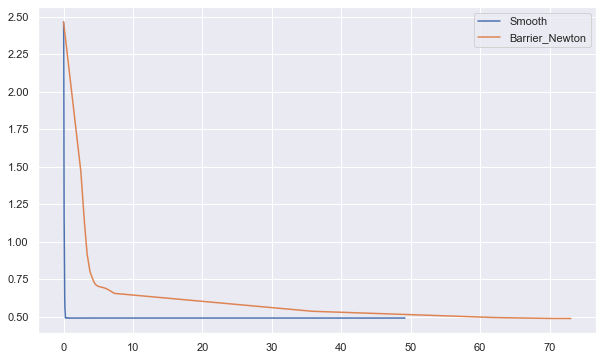

In [257]:
test_methods(k_max=10000, n_max=10, barrier_eps=1e-5, barrier_r0=1, smooth_steps=int(1e5), smooth_L=1e4, smooth_mu1=1e-2, flag_bar=True)

k=73857; n=5


100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [03:29<00:00, 477.53it/s]


Minumum_smooth = 0.32929472839781515
Minumum_barrier = 0.5541013220853376
Diff_between_solutions = 204.6549036%


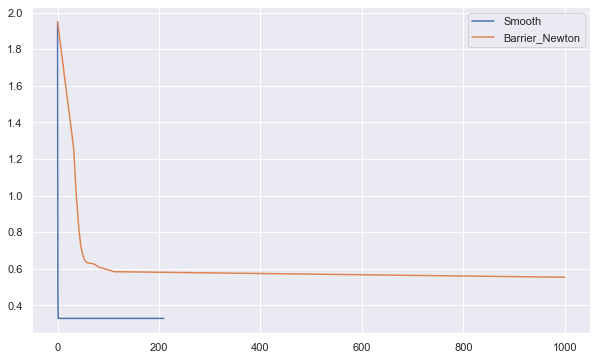

In [258]:
test_methods(k_max=100000, n_max=10, barrier_eps=1e-5, barrier_r0=1, smooth_steps=int(1e5), smooth_L=1e4, smooth_mu1=1e-2, flag_bar=True)

Барьерный метод стал опять очень плохо работать при больших k, когда метод сглаживания справляется.

# Third Pair of Tests

k=9; n=4


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 18513.48it/s]

Minumum_smooth = 0.2862730044615217
Minumum_barrier = 0.28571865909705463
Diff_between_solutions = 0.0019016%


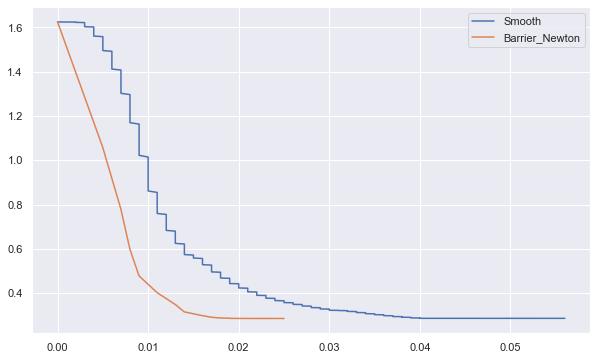

In [259]:
test_methods(k_max=10, n_max=10, barrier_eps=1e-5, barrier_r0=1, smooth_steps=int(1e3), smooth_L=1e4, smooth_mu1=1e-2, flag_bar=True)

k=42; n=17


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 17747.58it/s]

Minumum_smooth = 2.059666851585405
Minumum_barrier = 2.057108899191127
Diff_between_solutions = 0.0052284%


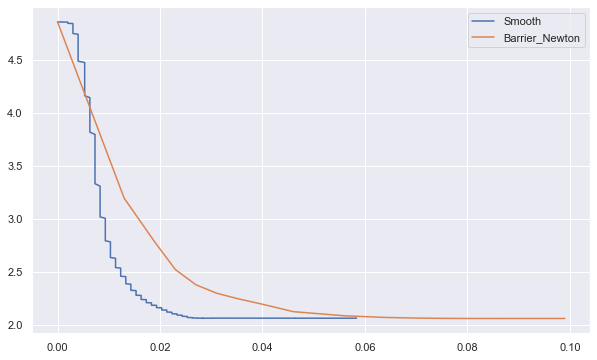

In [260]:
test_methods(k_max=100, n_max=100, barrier_eps=1e-5, barrier_r0=1, smooth_steps=int(1e3), smooth_L=1e4, smooth_mu1=1e-2, flag_bar=True)

k=322; n=219


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2680.27it/s]


Minumum_smooth = 51.88907883849874
Minumum_barrier = 51.837408471466354
Diff_between_solutions = 0.0015852%


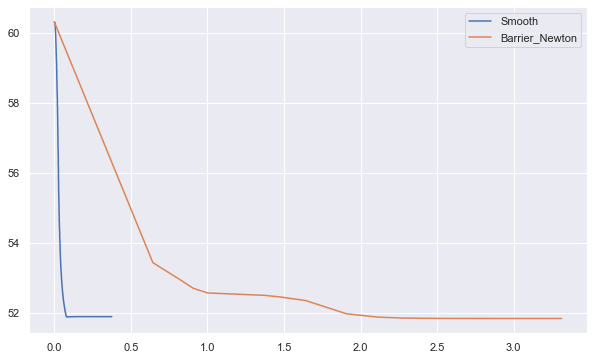

In [263]:
test_methods(k_max=1000, n_max=1000, barrier_eps=1e-5, barrier_r0=1, smooth_steps=int(1e3), smooth_L=1e4, smooth_mu1=1e-1, flag_bar=True)

k=8016; n=6217


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:56<00:00, 17.79it/s]


Minumum_smooth = 1587.8807043287425
Minumum_barrier = 1604.9246465183103
Diff_between_solutions = 0.0339005%


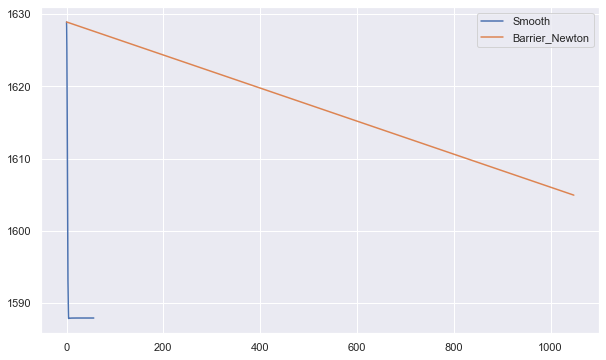

In [266]:
test_methods(k_max=10000, n_max=10000, barrier_eps=1e-5, barrier_r0=1, smooth_steps=int(1e3), smooth_L=1e4, smooth_mu1=4, flag_bar=True)

In [268]:
test_methods(k_max=100000, n_max=100000, barrier_eps=1e-5, barrier_r0=1, smooth_steps=int(1e3), smooth_L=1e4, smooth_mu1=4, flag_bar=True)

k=65000; n=62454


MemoryError: Unable to allocate 30.2 GiB for an array with shape (65000, 62454) and data type float64

При больших n и k барьерный метод + метод Ньютона начинают работать очень долго, так как требуют много времени для вычисления градиента и гессиана на каждом шаге, при этом скорость работы метода сглаживания падает гораздо медленнее.

Преимущество барьерного метода заключается в том, что им можно вычислить ответ с любой заданной точностью. В то же время метод сглаживания не будет работать при уменьшении mu (отвечающей за точность) в ~ 10 раз, так как в месте взятия экспоненты будет переполнение. Таким образом точность вычисления очень невысока.

На тех парах n и k, где получились результаты у обоих алгоритмов, видим очень близкие значения минимума функции и оптимальной точки. Это показывает, что оба алгоритма корректны, и правильно реализованы.